# Chameleon [summary of usefull info]

### Image

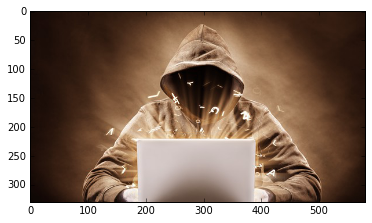

In [1]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('hacker.jpg')
plt.imshow(img)
plt.show()

In [2]:
img.shape

(330, 580, 3)

In [3]:
img[200,200] #if i get everything correct it is [R,G,B] format

array([213, 179, 143], dtype=uint8)

$\textbf{Question}$ - With which exactly numbers out of (R,G,B) does DCT work?

### (R,G,B) - different outcomes

[[36 36 37 37 37 38 39 38]
 [36 36 37 37 37 38 38 38]
 [36 36 37 37 37 38 38 38]
 [36 36 37 37 37 38 38 38]
 [36 36 37 37 37 38 38 38]
 [36 36 37 37 37 38 38 38]
 [35 36 36 37 37 38 38 38]
 [35 36 36 37 37 38 38 38]]


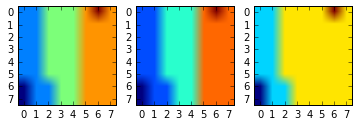

In [4]:
# Just to compare
part_of_the_img_0 = img[50:58, 50:58, 0] #using R
part_of_the_img_1 = img[50:58, 50:58, 1] #using G
part_of_the_img_2 = img[50:58, 50:58, 2] #using B
# Visualizing
fig = plt.figure()
ax0 = fig.add_subplot(131)
ax0.imshow(part_of_the_img_0)
ax1 = fig.add_subplot(132)
ax1.imshow(part_of_the_img_1)
ax2 = fig.add_subplot(133)
ax2.imshow(part_of_the_img_2)

### DCT

There is no 2d implementation of DCT in python, but we can construct the matrix of transformation and use it to make DCT

In [5]:
# This part was copied from the web, so better to check.
N=8
W = np.zeros((N, N))
for i in range(N):
    W[0,i] = 1
for i in xrange(1,N):
    for k in xrange(N):
        W[i,k] = 2*np.cos((np.pi/N) * i * (k + 0.5) )
W=W.T

After we computed the transform matrix, we will write our own DTC function

In [6]:
def DCT(grid):   #forward DCT
    return np.dot(np.dot(W, grid), W.T)
def DCT_b(grid): #inverse DCT
    Wi=np.linalg.inv(W)
    return np.dot(np.dot(Wi, grid), Wi.T)

Let's try our DTC on the 8*8 matrixes from above (I mean colored subplots)

[[  3.80463353e+03  -1.31929251e+03   7.22572242e+02  -4.82455372e+02
    2.97586003e+02  -2.00178363e+02   1.29237787e+02  -3.72346331e+01]
 [ -1.22692682e+03   4.30464887e+02  -2.31552747e+02   1.53440651e+02
   -9.98252449e+01   6.80483595e+01  -3.98477591e+01   2.04611003e+01]
 [  6.92291803e+02  -2.50427775e+02   1.33877897e+02  -8.67279972e+01
    5.70059019e+01  -3.61522409e+01   1.64848704e+01  -1.56279424e+01]
 [ -4.48374190e+02   1.60830805e+02  -8.40406246e+01   5.48490539e+01
   -3.87653669e+01   2.67006338e+01  -1.30103893e+01   1.26965619e+01]
 [  3.05090781e+02  -1.10283411e+02   5.98450254e+01  -3.87653669e+01
    2.42852260e+01  -1.47407268e+01   6.80101183e+00  -5.44667734e+00]
 [ -2.00187891e+02   6.70751245e+01  -3.61522409e+01   2.48013388e+01
   -1.62637458e+01   1.24257357e+01  -9.18239343e+00   2.06630588e+00]
 [  1.16609720e+02  -3.98477591e+01   2.35618094e+01  -1.58105821e+01
    7.49474570e+00  -4.00724791e+00   3.43003932e+00   1.82606862e+00]
 [ -3.7234633

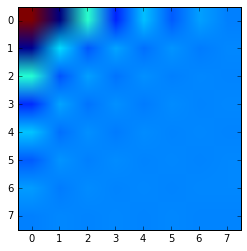

In [7]:
plt.imshow(DCT(part_of_the_img_0))

And now we will try to undo our DTC

[[ 36.  36.  37.  37.  37.  38.  39.  38.]
 [ 36.  36.  37.  37.  37.  38.  38.  38.]
 [ 36.  36.  37.  37.  37.  38.  38.  38.]
 [ 36.  36.  37.  37.  37.  38.  38.  38.]
 [ 36.  36.  37.  37.  37.  38.  38.  38.]
 [ 36.  36.  37.  37.  37.  38.  38.  38.]
 [ 35.  36.  36.  37.  37.  38.  38.  38.]
 [ 35.  36.  36.  37.  37.  38.  38.  38.]]


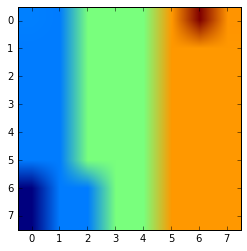

In [22]:
plt.imshow(DCT_b(DCT(part_of_the_img_0)))

As we can see everything works, though I really think you should check matrix thing

## Let's dive more into the details

To understand what is going on with the DCT, we should start with DFT 

### Some definitions

$\textbf{Number of samples}$ - amount of measured signal values

$\textbf{Sampling frequency}$ - the number of samples taken during $1$ sec

$\textbf{Frequency resolution:} = \frac{sampling \ frequency}{num \ of \ samples}$ - the distance between the point in hertz

$\textbf{Nyquist  limit} = \frac{(sampling \ frequency)}{2}$

$\textbf{Nyquist–Shannon sampling theorem}$ - If the maximum frequency of the continious signal was $F_{max}$, then the signal could be recovered without the errors if $F_{max} < Nyquist \ limit$

### $f(x) = sin(2\pi x)$ - or 1Hz

In [9]:
from numpy import fft

In [10]:
#Sine wave - 1Hz <-> f(t) = sin(2*pi*t)
#Amplitude = 1
#Sampling frequency = 8Hz
#8 samples
#Frequency resolution - 1Hz
#Nyquist  limit = 8Hz/2 = 4Hz
sample = [0,.707,1,.707,0,-.707,-1,-.707]

In [11]:
dft = fft.fft(sample)

In [12]:
m_dft = abs(dft)

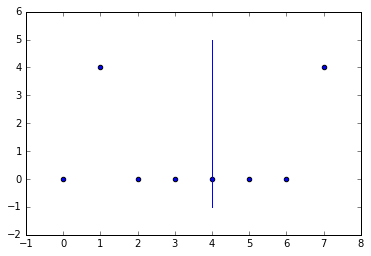

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter(range(0,len(m_dft)),m_dft)
plt.plot([8/2, 8/2], [-1, 5]) # nyquist limit
plt.show()

##### Let's get the real frequency haracteristics of the signal

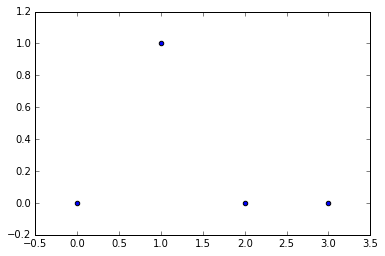

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
r_dft = m_dft[0:4] #take the values less than the nyquist limit double them and divide by the amount of samples
plt.scatter(range(0,len(r_dft)),2*r_dft/8)
plt.show()

#### The reverse transformation

In [15]:
our_coeff = fft.ifft(dft)
print our_coeff
#our initial coeff = [0,.707,1,.707,0,-.707,-1,-.707]

[ 0.000 +0.00000000e+00j  0.707 +2.22044605e-16j  1.000 -8.26946080e-16j
  0.707 -2.22044605e-16j  0.000 +0.00000000e+00j -0.707 -2.22044605e-16j
 -1.000 +8.26946080e-16j -0.707 +2.22044605e-16j]


### $f(x) = cos(2\pi x)$ or 1 Hz

In [16]:
import numpy as np

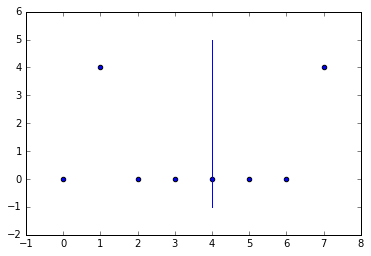

In [17]:
%matplotlib inline
import math
from matplotlib import pyplot as plt
val = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]
func_val = np.cos(2*math.pi*np.array(val))
dft = fft.fft(func_val)
m_dft = abs(dft)
a = plt.scatter(range(0,len(m_dft)),m_dft)
plt.plot([8/2, 8/2], [-1, 5]) # nyquist limit
plt.show()

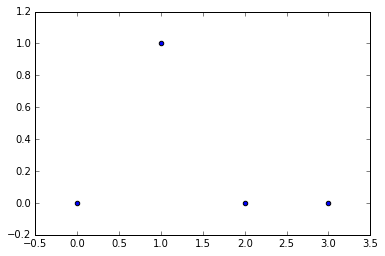

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
r_dft = m_dft[0:4] #take the values less than the nyquist limit double them and divide by the amount of samples
plt.scatter(range(0,len(r_dft)),2*r_dft/8)
plt.show()

The differnces of the two situation is the ange of the complex numbers

#### The reverse transformation

In [19]:
our_coeff = fft.ifft(dft)
print our_coeff

[  1.00000000e+00 +0.00000000e+00j   7.07106781e-01 +2.22044605e-16j
   6.12323400e-17 +0.00000000e+00j  -7.07106781e-01 +2.22044605e-16j
  -1.00000000e+00 +0.00000000e+00j  -7.07106781e-01 -2.22044605e-16j
  -1.83697020e-16 +0.00000000e+00j   7.07106781e-01 -2.22044605e-16j]


## Let's define the matrix of DFT for 8 elements array

In [20]:
#I have done some mistake in this matrix, so please check and you :)
#r = np.sqrt(2)/2
#R_DFT = np.matrix([[1,1,1,1,1,1,1,1],\
#                  [1,r,0,-r,-1,-r,0,r],\
#                  [1,0,-1,0,1,0,-1,0],\
#                  [1,-r,0,r,-1,r,0,-r],\
#                  [1,-1,1,-1,1,-1,1,-1],\
#                  [1,-r,0,r,-1,r,0,-r],\
#                  [1,0,-1,0,1,0,-1,0],\
#                  [1,r,0,-r,-1,-r,0,r]])

In [21]:
#import pandas as pd
#pd.DataFrame(R_DFT*R_DFT)